- Exercise 1.1

Load the image dog.jpg and compute the full SVD.

Choose a rank r < m and confirm that the matrix U*U is the r by r identity matrix.

Now confirm that UU* is not the identity matrix.

Compute the norm of the error between UU* and the n by n identity matrix as the rank r varies from 1 to n and plot the error.

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os # operating system

In [2]:
# Load the image dog.jpg
A = imread(os.path.join('..','Data','dog.jpg'))

X = np.mean(A, 2)

print(X.shape)   # n = 2000, m = 1500

(2000, 1500)


In [3]:
# Compute the full SVD
U, S, VT = np.linalg.svd(X, full_matrices=True)     

U.shape

(2000, 2000)

In [4]:
# Choose a rank r < m 
r = 3

# Confirm that the matrix U*U is the r by r identity matrix
UstarU = U[:,:r].T @ U[:,:r]

print(UstarU.shape)
UstarU

(3, 3)


array([[ 1.00000000e+00,  8.67361738e-17,  3.08780779e-16],
       [ 8.67361738e-17,  1.00000000e+00, -1.94289029e-16],
       [ 3.08780779e-16, -1.94289029e-16,  1.00000000e+00]])

In [5]:
# Confirm that UU* is not the identity matrix
UUstar = U[:,:r] @ U[:,:r].T

print(UUstar.shape)
UUstar[1:5,1:5]

(2000, 2000)


array([[0.00068618, 0.00068493, 0.00068658, 0.0006853 ],
       [0.00068493, 0.0006837 , 0.00068533, 0.00068404],
       [0.00068658, 0.00068533, 0.00068699, 0.0006857 ],
       [0.0006853 , 0.00068404, 0.0006857 , 0.00068445]])

In [6]:
n = UUstar.shape[1]
I_n = np.identity(n)

In [7]:
r = np.arange(1,n+1)
norm_vec = np.zeros_like(r)

for i in r:
    UUstar = U[:,:i] @ U[:,:i].T
    norm_vec[i-1] = np.linalg.norm( np.subtract(UUstar, I_n) )   # Frobenius norm


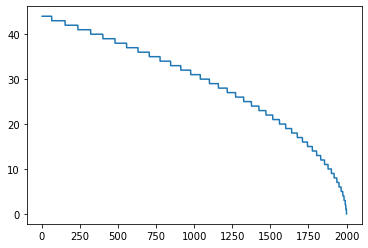

In [8]:
plt.plot(r, norm_vec)
plt.show()

- Exercise 1.2

Load the image dog.jpg and compute the economy SVD.

Compute the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank r.

Square this error to compute the fraction of missing variance as a function of r.

You may also decide to plot 1 minus the error or missing variance to visualize the amount of norm or variance captured at a given rank r.

Plot these quantities along with the cumulative sum of singular values as a function of r.

Find the rank r where the reconstruction captures 99% of the total variance.

Compare this with the rank r where the reconstruction captures 99% in the Frobenius norm and with the rank r that captures 99% of the cumulative sum of singular values.


In [10]:
# Compute the economy SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

U.shape

(2000, 1500)

In [11]:
S = np.diag(S)

r = np.arange(1, U.shape[1]+1)
relative_err = np.zeros_like(r)

# Compute the relative reconstruction error of the truncated SVD in the Frobenius norm 
# as a function of the rank r
for i in r:
    Xi = U[:,:i] @ S[:i,:i] @ VT[:i,:] 
    relative_err[i-1] = np.linalg.norm(np.subtract(Xi, X))
    
relative_err = relative_err/np.linalg.norm(X)

In [12]:
print(relative_err)

[3.15752700e-01 2.47935418e-01 1.95264803e-01 ... 1.91286053e-05
 1.27524035e-05 0.00000000e+00]


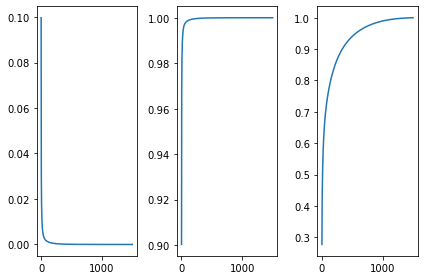

In [13]:
fig, axs = plt.subplots(1,3)
axs[0].plot(r, relative_err**2)                           # the fraction of missing variance as a function of r
axs[1].plot(r, 1-relative_err**2)                         # the amount of norm or variance captured at a given rank r
axs[2].plot(r, np.cumsum(np.diag(S))/np.sum(np.diag(S)))  # the cumulative sum of singular values as a function of r

fig.tight_layout()

In [18]:
# Find the rank r where the reconstruction captures 99% of the total variance
np.min(np.where((1-relative_err**2) > 0.99)) 

15

In [15]:
# Find the rank r where the reconstruction captures 99% in the Frobenius norm
np.min(np.where((1-relative_err) > 0.99))

436

In [21]:
# Find the rank r that captures 99% of the cumulative sum of singular values

np.min(np.where(np.cumsum(np.diag(S))/np.sum(np.diag(S)) > 0.99))
# temp = np.absolute((np.cumsum(np.diag(S))/np.sum(np.diag(S)))-0.99)
# index_r = temp.argmin()
# index_r + 1

1006